# Air Quality in Beijing

## Data Visualization

In [3]:
#-----------------------------------------------------------------------------------------
# Name:        Practice Day 3
# Author:      Erick Rico
# Created:     05/08/2025
#-----------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clean_df.csv")

In [4]:
df.columns

Index(['full_date', 'pm2.5', 'temperature', 'pressure'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_date    43824 non-null  object 
 1   pm2.5        43824 non-null  float64
 2   temperature  43824 non-null  float64
 3   pressure     43824 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [11]:
df["full_date"] = pd.to_datetime(df["full_date"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_date    43824 non-null  datetime64[ns]
 1   pm2.5        43824 non-null  float64       
 2   temperature  43824 non-null  float64       
 3   pressure     43824 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


In [14]:
type(df["full_date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df.head()

,full_date,pm2.5,temperature,pressure
0,2010-01-01,90.442573,-11.0,1021.0
1,2010-01-01,90.442573,-12.0,1020.0
2,2010-01-01,90.442573,-11.0,1019.0
3,2010-01-01,90.442573,-14.0,1019.0
4,2010-01-01,90.442573,-12.0,1018.0


<function matplotlib.pyplot.show(close=None, block=None)>

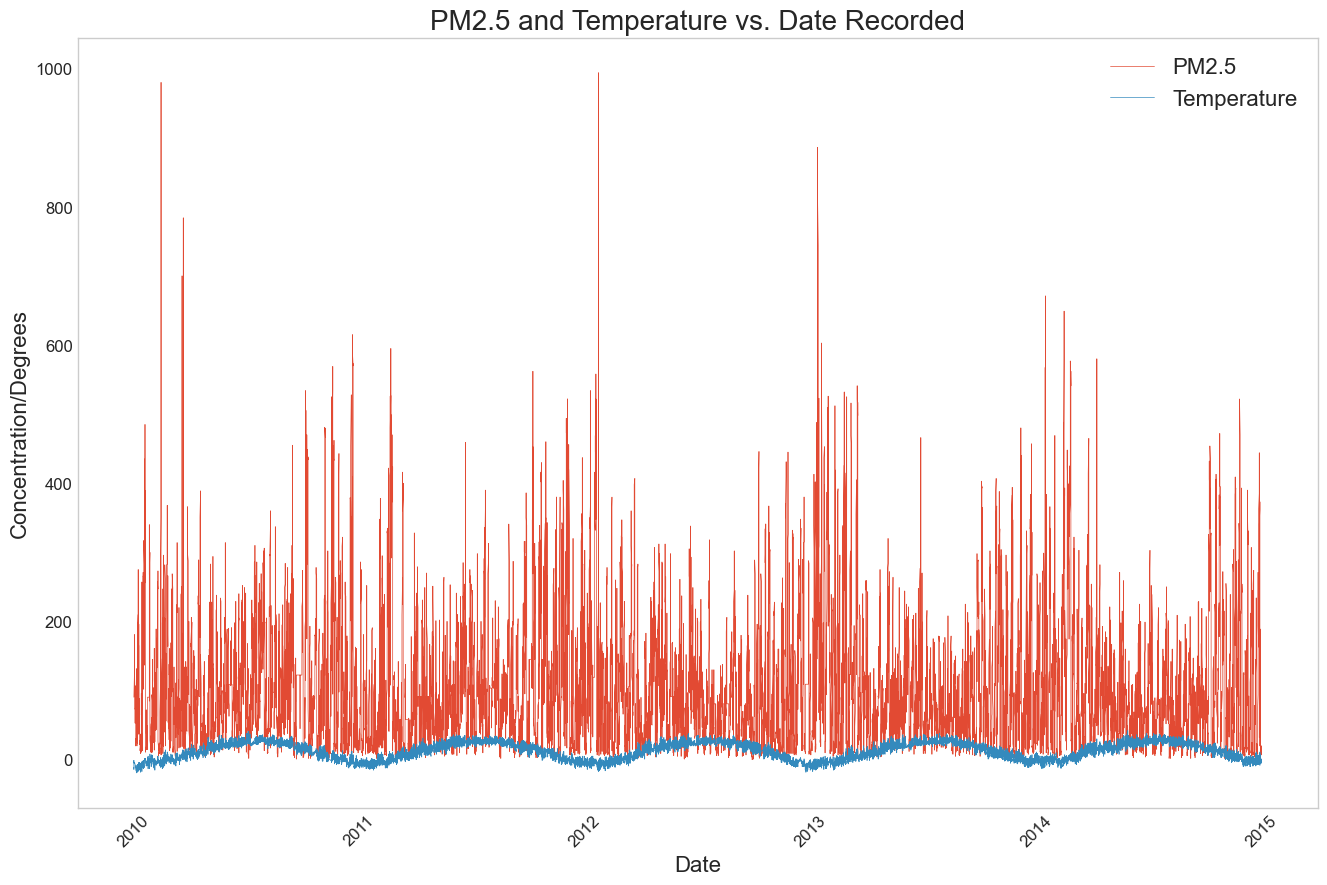

In [81]:
plt.figure(figsize=(16, 10))
plt.plot(df["full_date"], df[["pm2.5", "temperature"]], lw=0.5)
plt.title("PM2.5 and Temperature vs. Date Recorded", fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Concentration/Degrees", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["PM2.5", "Temperature"], fontsize=16)
plt.grid(False)
plt.show

- Parece que la concentración de PM2.5 concentration tiene picos cuando la temperatura es baja. Esto es un fenómeno atmosférico conocido (a menudo relacionado con las inversiones térmicas en invierno).
- La imagen del codigo anterior es sencilla y tiene mucho ruido, dado que es una time series con mucho valores

<function matplotlib.pyplot.show(close=None, block=None)>

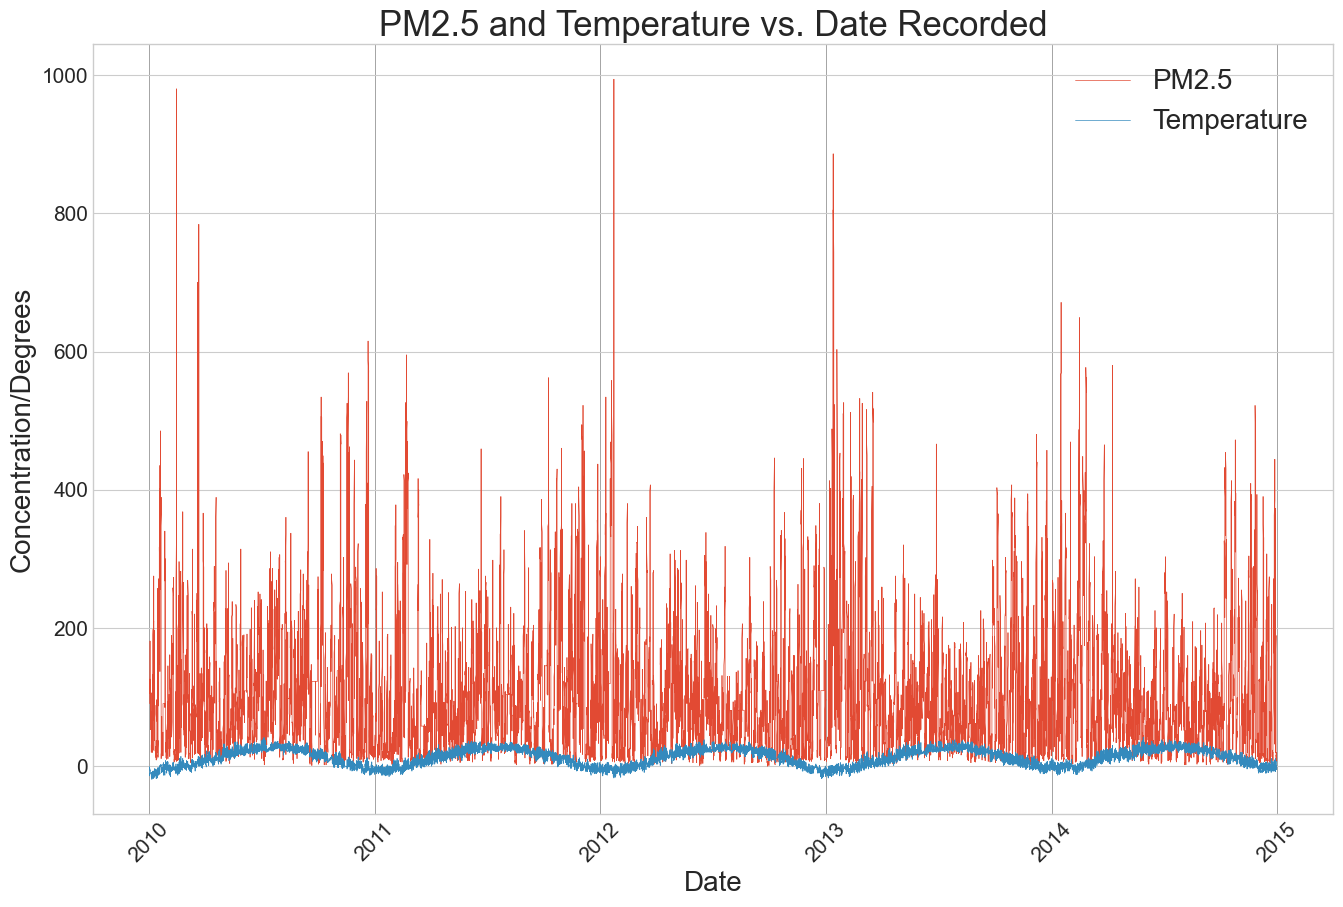

In [89]:
# Usando estilos
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 10))
plt.plot(df["full_date"], df[["pm2.5", "temperature"]], lw=0.5)
plt.title("PM2.5 and Temperature vs. Date Recorded", fontsize=25)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Concentration/Degrees", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(["PM2.5", "Temperature"], fontsize=20)
plt.grid(axis="x", ls="-", lw=0.5, color="gray")
plt.show

- La figura del código anterior solo muestra pruebas que estuve haciendo con estilos distintos.

In [83]:
# Observando que mis datos son horarios, entonces 24 filas = 1 día, 720 ≈ 1 mes
print(df["full_date"].head(49))
df["full_date"].diff().value_counts()

0    2010-01-01
1    2010-01-01
2    2010-01-01
3    2010-01-01
4    2010-01-01
5    2010-01-01
6    2010-01-01
7    2010-01-01
8    2010-01-01
9    2010-01-01
10   2010-01-01
11   2010-01-01
12   2010-01-01
13   2010-01-01
14   2010-01-01
15   2010-01-01
16   2010-01-01
17   2010-01-01
18   2010-01-01
19   2010-01-01
20   2010-01-01
21   2010-01-01
22   2010-01-01
23   2010-01-01
24   2010-01-02
25   2010-01-02
26   2010-01-02
27   2010-01-02
28   2010-01-02
29   2010-01-02
30   2010-01-02
31   2010-01-02
32   2010-01-02
33   2010-01-02
34   2010-01-02
35   2010-01-02
36   2010-01-02
37   2010-01-02
38   2010-01-02
39   2010-01-02
40   2010-01-02
41   2010-01-02
42   2010-01-02
43   2010-01-02
44   2010-01-02
45   2010-01-02
46   2010-01-02
47   2010-01-02
48   2010-01-03
Name: full_date, dtype: datetime64[ns]


full_date
0 days    41998
1 days     1825
Name: count, dtype: int64

Observando los resultados, se tiene que:

- En 41,998 casos, la diferencia entre filas es 0 días (es decir, la hora cambia pero la fecha es igual).
- En 1,825 casos, la diferencia es de 1 día (es decir, la fecha cambia al siguiente día).
- Esto confirma que tienes datos horarios: cada día tiene 24 registros (horas), y luego la fecha avanza.

<function matplotlib.pyplot.show(close=None, block=None)>

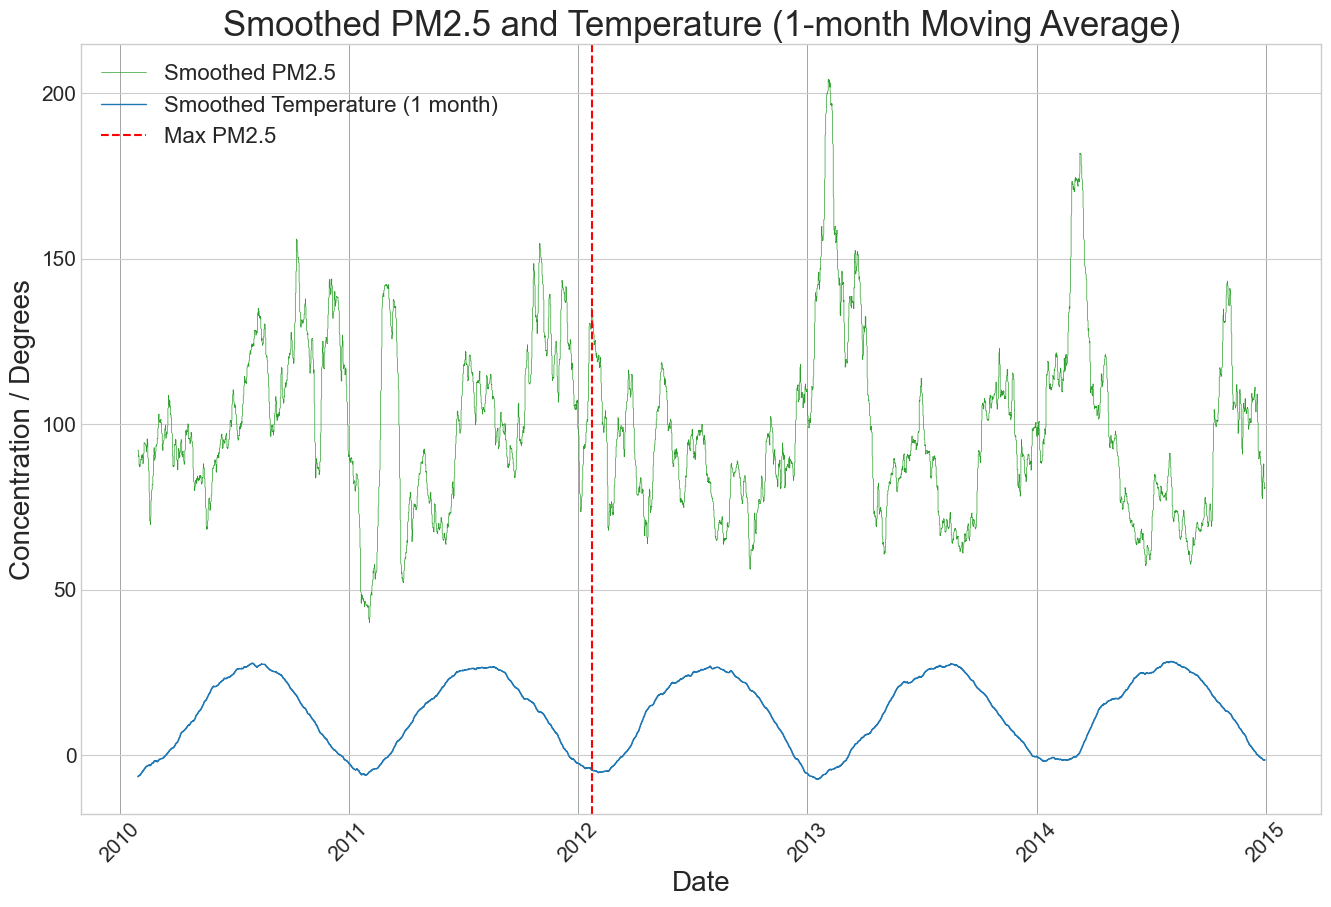

In [90]:
# Encontrando el índice donde pm2.5 es el máximo
max_idx = df["pm2.5"].idxmax()
max_date = df.loc[max_idx, "full_date"]

# Mejorando el gráfico con una ventana de suavizado de 1 mes (24*30 = 720)
# Usando una ventana de 720 (30 días) para suavizar los datos
roll_df = df[["pm2.5", "temperature"]].rolling(window=720).mean()

plt.figure(figsize=(16, 10))
plt.plot(df["full_date"], roll_df["pm2.5"], lw=0.5, label="Smoothed PM2.5", color="tab:green")    
plt.plot(df["full_date"], roll_df["temperature"], lw=1, label="Smoothed Temperature (1 month)", color="tab:blue")
plt.title("Smoothed PM2.5 and Temperature (1-month Moving Average)", fontsize=25)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Concentration / Degrees", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(max_date, ls="--", label="Max PM2.5", color="red")
plt.legend(fontsize=16)
plt.grid(axis="x", ls="-", lw=0.5, color="gray")
plt.savefig("smoothed_pm2.5_temperature.png", dpi=300, bbox_inches="tight")
plt.show


- La gráfica con suavizado de 1 mes se ve muy bien: elimina la mayor parte del ruido y permite ver claramente las tendencias y patrones estacionales en PM2.5 y temperatura. Fue una excelente elección para visualizar datos horarios cuando se quiere observar variaciones mensuales sin perder la forma general de la serie.

- Si se buscará ver tendencias a más largo plazo (ciclos anuales), se podría probar con ventanas más grandes, pero para análisis mensual y estacional, el suavizado de 1 mes es ideal.

**Nota:**

En la gráfica, la línea roja marca el valor máximo puntual de PM2.5 (sin suavizar), ya que este representa el evento real más alto registrado en la serie original. La serie verde muestra los valores suavizados (promedio móvil de 1 mes), por lo que los picos extremos se "aplanan" y pueden verse más bajos o desplazados. Por eso, el máximo suavizado no necesariamente coincide con el máximo real. Marcar el máximo puntual es útil para identificar eventos extremos reales, mientras que el suavizado ayuda a ver tendencias generales.